## Model Building

Raro, regresionará con Lasso que se usó para Feature Selection, se podría haber hecho los dos pasos juntos.

In [35]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error

pd.pandas.set_option("display.max_columns", None)

In [36]:
X_train = pd.read_csv("../../datasets/xtrain.csv")
X_test = pd.read_csv("../../datasets/xtest.csv")

X_train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,931,12.211060,0.000000,0.75,0.461171,0.377048,1.0,1.0,0.333333,1.000000,1.0,0.0,0.0,0.863636,0.4,1.0,0.75,0.6,0.777778,0.50,0.014706,0.049180,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,0.75,1.000000,0.002835,0.666667,0.0,0.673479,0.239935,1.0,1.00,1.0,1.0,0.559760,0.0,0.0,0.523250,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.416667,1.0,0.000000,0.2,0.8,0.018692,1.000000,0.75,0.430183,0.666667,1.0,1.0,0.116686,0.032907,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,0.0,0.0,0.0
1,657,11.887931,0.000000,0.75,0.456066,0.399443,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.444444,0.75,0.360294,0.049180,0.0,0.0,0.6,0.6,0.666667,0.03375,0.666667,1.0,0.5,0.50,0.75,0.25,0.666667,0.142807,0.666667,0.0,0.114724,0.172340,1.0,1.00,1.0,1.0,0.434539,0.0,0.0,0.406196,0.333333,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.250000,1.0,0.000000,0.2,0.8,0.457944,0.666667,0.25,0.220028,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.50,1.0,0.0,0.636364,0.50,0.666667,0.75,0.0,0.0,0.0
2,46,12.675764,0.588235,0.75,0.394699,0.347082,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.954545,0.4,1.0,1.00,0.6,0.888889,0.50,0.036765,0.098361,1.0,0.0,0.3,0.2,0.666667,0.25750,1.000000,1.0,1.0,1.00,0.75,0.25,1.000000,0.080794,0.666667,0.0,0.601951,0.286743,1.0,1.00,1.0,1.0,0.627205,0.0,0.0,0.586296,0.333333,0.0,0.666667,0.0,0.250,0.333333,1.000000,0.333333,1.0,0.333333,0.8,0.8,0.046729,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.228705,0.149909,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.090909,1.00,0.666667,0.75,0.0,0.0,0.0
3,1349,12.278393,0.000000,0.75,0.388581,0.493677,1.0,1.0,0.666667,0.666667,1.0,0.0,0.0,0.454545,0.4,1.0,0.75,0.6,0.666667,0.50,0.066176,0.163934,0.0,0.0,1.0,1.0,0.000000,0.00000,0.666667,1.0,1.0,0.75,0.75,1.00,1.000000,0.255670,0.666667,0.0,0.018114,0.242553,1.0,1.00,1.0,1.0,0.566920,0.0,0.0,0.529943,0.333333,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.4,0.8,0.084112,0.666667,0.50,0.362482,0.666667,1.0,1.0,0.469078,0.045704,0.0,0.000000,0.0,0.0,0.0,0.75,1.0,0.0,0.636364,0.25,0.666667,0.75,1.0,0.0,0.0
4,56,12.103486,0.000000,0.75,0.577658,0.402702,1.0,1.0,0.333333,0.333333,1.0,0.0,0.0,0.363636,0.4,1.0,0.75,0.6,0.555556,0.50,0.323529,0.737705,0.0,0.0,0.6,0.7,0.666667,0.17000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.086818,0.666667,0.0,0.434278,0.233224,1.0,0.75,1.0,1.0,0.549026,0.0,0.0,0.513216,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.333333,0.416667,1.0,0.333333,0.8,0.8,0.411215,0.666667,0.50,0.406206,0.666667,1.0,1.0,0.000000,0.000000,0.0,0.801181,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.50,0.666667,0.75,0.0,0.0,0.0


In [37]:
X_test.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,530,12.209188,0.000000,0.75,0.388581,0.630999,1.0,1.0,0.333333,0.333333,1.0,1.0,0.0,0.727273,0.4,1.0,0.75,0.6,0.555556,0.250,0.367647,0.540984,1.0,0.0,0.1,0.5,0.333333,0.000000,0.666667,1.0,1.0,0.50,0.75,0.25,0.166667,0.215982,0.666667,0.00000,0.379006,0.333061,1.0,0.5,1.0,1.000000,0.764014,0.000000,0.0,0.714182,0.333333,0.0,1.000000,0.0,0.500,0.666667,0.333333,0.583333,0.0,0.666667,0.6,0.8,0.299065,0.666667,0.50,0.341326,0.666667,1.0,1.0,0.000000,0.000000,0.362319,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.181818,0.25,0.666667,0.00,1.0,1.0,0.0
1,492,11.798104,0.176471,0.75,0.490408,0.389061,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.363636,0.0,1.0,0.75,0.2,0.555556,0.750,0.477941,0.934426,0.0,0.0,0.1,0.1,0.000000,0.000000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.071403,0.500000,0.11194,0.110543,0.131915,1.0,0.5,1.0,0.666667,0.398758,0.331197,0.0,0.549294,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.000000,0.250000,1.0,0.666667,0.6,0.8,0.607477,0.333333,0.25,0.169252,0.666667,1.0,1.0,0.000000,0.000000,0.057971,0.0,0.0,0.0,0.0,0.50,1.0,0.0,0.636364,0.00,0.666667,0.75,0.0,0.0,0.0
2,460,11.608236,0.176471,0.75,0.388581,0.329918,1.0,1.0,0.333333,0.000000,1.0,0.5,0.0,0.181818,0.4,1.0,0.75,0.2,0.444444,0.375,0.433824,0.983607,0.0,0.0,0.3,0.2,0.333333,0.100625,0.333333,1.0,0.5,0.50,0.75,0.25,0.500000,0.032778,0.666667,0.00000,0.243381,0.116039,1.0,0.5,1.0,1.000000,0.406964,0.119658,0.0,0.453307,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.666667,0.250000,1.0,0.333333,0.6,0.4,0.551402,0.333333,0.25,0.248237,0.666667,1.0,1.0,0.000000,0.000000,0.449275,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.545455,0.75,0.666667,0.75,1.0,0.0,0.0
3,280,12.165251,0.235294,0.75,0.508690,0.399404,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.772727,0.4,1.0,0.75,1.0,0.666667,0.500,0.227941,0.524590,1.0,0.0,0.7,0.7,0.666667,0.186875,0.333333,1.0,0.5,0.75,0.75,0.25,0.333333,0.069454,0.666667,0.00000,0.356712,0.189853,1.0,1.0,1.0,1.000000,0.469855,0.462607,0.0,0.636999,0.000000,0.0,0.666667,0.5,0.500,0.333333,0.333333,0.500000,1.0,0.333333,0.6,0.8,0.289720,1.000000,0.50,0.356135,0.666667,1.0,1.0,0.336056,0.213894,0.000000,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.181818,0.50,0.666667,0.75,0.0,0.0,0.0
4,656,11.385092,0.823529,0.25,0.000000,0.050188,1.0,1.0,0.000000,0.333333,1.0,0.0,0.0,0.090909,0.4,1.0,0.50,1.0,0.555556,0.500,0.286765,0.655738,0.0,0.0,0.6,0.5,0.666667,0.238125,0.333333,1.0,0.5,0.50,0.75,0.25,0.833333,0.000000,0.666667,0.00000,0.243846,0.085925,1.0,0.5,1.0,1.000000,0.171149,0.302885,0.0,0.419061,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.333333,0.333333,1.0,0.000000,0.2,0.4,0.364486,0.333333,0.25,0.186178,0.666667,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.181818,1.00,0.666667,0.50,0.0,0.0,0.0


In [38]:
y_train = X_train["SalePrice"]
y_test = X_test["SalePrice"]

In [39]:
features = pd.read_csv("../../datasets/selected_features.csv", header=None)[0].tolist()
features

['MSSubClass',
 'MSZoning',
 'Neighborhood',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'MasVnrType',
 'BsmtQual',
 'BsmtExposure',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'PavedDrive']

In [40]:
## Se agrega un feature que se usará después
features += ["LotFrontage"]

In [41]:
X_train = X_train[features]
X_test = X_test[features]

X_train.head()

,MSSubClass,MSZoning,Neighborhood,OverallQual,OverallCond,YearRemodAdd,RoofStyle,MasVnrType,BsmtQual,BsmtExposure,HeatingQC,CentralAir,1stFlrSF,GrLivArea,BsmtFullBath,KitchenQual,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,PavedDrive,LotFrontage
0,0.000000,0.75,0.863636,0.777778,0.50,0.049180,0.0,0.000000,0.75,0.75,1.00,1.0,0.559760,0.523250,0.000000,0.666667,0.000000,0.2,0.8,1.000000,0.75,1.0,0.461171
1,0.000000,0.75,0.363636,0.444444,0.75,0.049180,0.0,0.666667,0.50,0.25,1.00,1.0,0.434539,0.406196,0.333333,0.666667,0.000000,0.2,0.8,0.666667,0.25,1.0,0.456066
2,0.588235,0.75,0.954545,0.888889,0.50,0.098361,1.0,0.666667,1.00,0.25,1.00,1.0,0.627205,0.586296,0.333333,1.000000,0.333333,0.8,0.8,0.666667,0.50,1.0,0.394699
3,0.000000,0.75,0.454545,0.666667,0.50,0.163934,0.0,0.000000,0.75,1.00,1.00,1.0,0.566920,0.529943,0.333333,0.666667,0.333333,0.4,0.8,0.666667,0.50,1.0,0.388581
4,0.000000,0.75,0.363636,0.555556,0.50,0.737705,0.0,0.666667,0.50,0.25,0.75,1.0,0.549026,0.513216,0.000000,0.333333,0.333333,0.8,0.8,0.666667,0.50,1.0,0.577658


## Regularized Linear Regression

In [42]:
model = Lasso(alpha=0.005, random_state=0)
model.fit(X_train, y_train)

Lasso(alpha=0.005, random_state=0)

In [46]:
# Verifying performance.
# In train set
pred = np.exp(model.predict(X_train))
y = np.exp(y_train) # La variable original era un logaritmo.... No claro por qué se hizo eso en su momento.
print("Train MSE:", mean_squared_error(pred, y))
print("Train RMSE:", np.sqrt(mean_squared_error(pred, y)))
print("Median predicted House Price:", y.median())

Train MSE: 1087435415.441454
Train RMSE: 32976.28565259365
Median predicted House Price: 163000.00000000012


In [47]:
# Verifying performance.
# In test set
pred = np.exp(model.predict(X_test))
y = np.exp(y_test) # La variable original era un logaritmo.... No claro por qué se hizo eso en su momento.
print("Test MSE:", mean_squared_error(pred, y))
print("Test RMSE:", np.sqrt(mean_squared_error(pred, y)))

print("Median predicted House Price:", y.median())

Test MSE: 1405259552.2596037
Test RMSE: 37486.791704006944
Median predicted House Price: 161199.99999999977


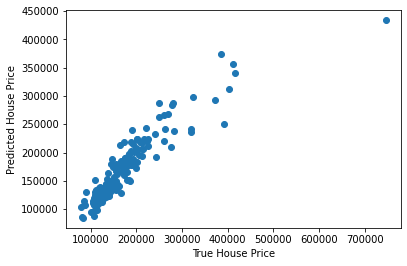

In [49]:
plt.scatter(y, pred)
plt.xlabel("True House Price")
plt.ylabel("Predicted House Price")
plt.show()

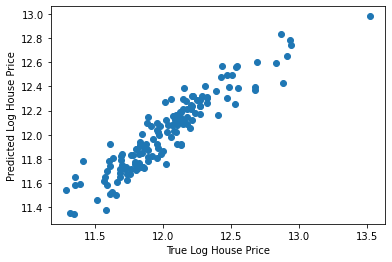

In [51]:
plt.scatter(y_test, np.log(pred))
plt.xlabel("True Log House Price")
plt.ylabel("Predicted Log House Price")
plt.show()

<AxesSubplot:>

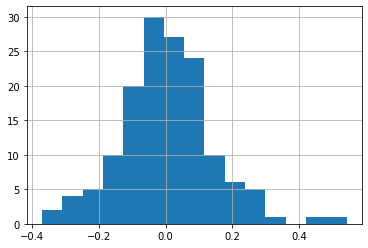

In [53]:
# Distribution of the errors. Should be fairly normal.
errors = y_test - model.predict(X_test)
errors.hist(bins=15)

## Feature Importance

Text(0.5, 1.0, 'Feature Importance')

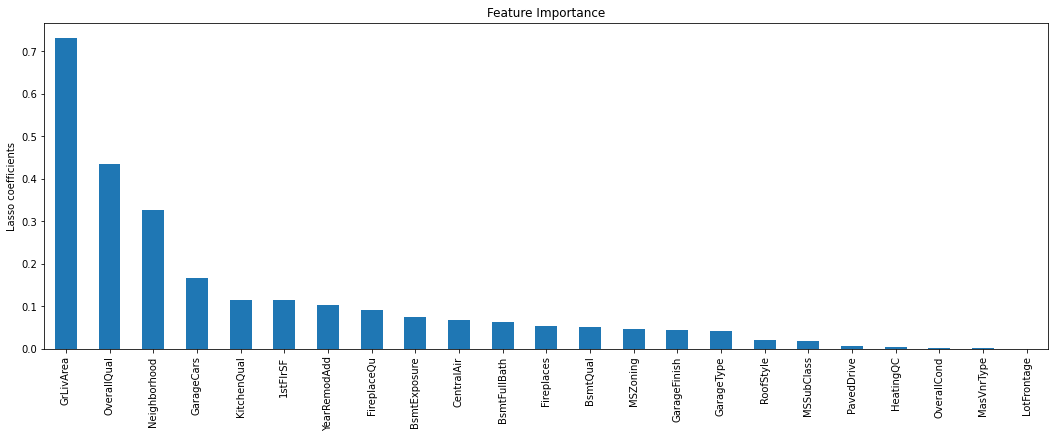

In [56]:
importance = pd.Series(np.abs(model.coef_.ravel())) # Ver el ravel.
importance.index = features
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel("Lasso coefficients")
plt.title("Feature Importance")